# Dataset of transit boards in Niterói- RJ
https://dados-geoniteroi.opendata.arcgis.com/datasets/545dd49be2c84123bac20024411b663f_10/explore?location=-22.923301%2C-43.059100%2C13.71

## Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

## The dataset

In [2]:
data = pd.read_csv('Data/Placas_Neltur.csv')

In [3]:
data= data[['X','Y']]

In [4]:
# Shape of the dataset
data.shape

(253, 2)

In [5]:
data.head()

,X,Y
0,-43.095849,-22.889417
1,-43.094007,-22.889563
2,-43.107802,-22.902906
3,-43.106539,-22.905421
4,-43.105506,-22.906442


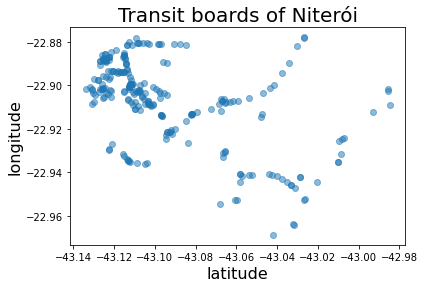

In [6]:
# Fixing random state for reproducibility
np.random.seed(10)


x = data['X'].values
y = data['Y'].values


plt.title('Transit boards of Niterói', fontsize=20)
plt.xlabel('latitude', fontsize=16)
plt.ylabel('longitude', fontsize=16)
plt.scatter(x, y,   alpha=0.5)
plt.show()

## KMeans

In [7]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(data, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

/home/annagomes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


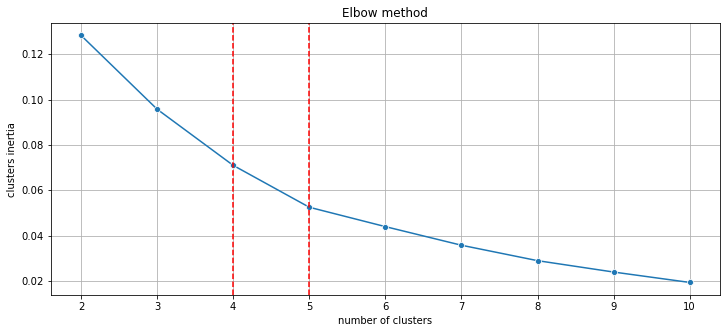

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

Using the elbow method, the ideal k value ranges from 4 to 5.

/home/annagomes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


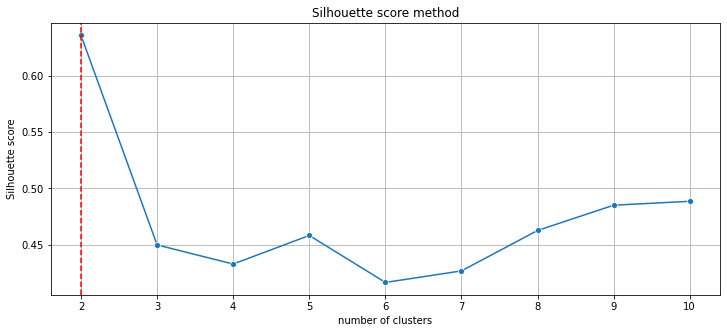

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Using the silhouette method, the best value for k is 2.

In [10]:
KM_8_clusters = KMeans(n_clusters=8, init='k-means++').fit(data) # initialise and fit K-Means model

KM8_clustered = data.copy()
KM8_clustered.loc[:,'Cluster'] = KM_8_clusters.labels_ # append labels to points

In [11]:
KM8_clustered

,X,Y,Cluster
0,-43.095849,-22.889417,0
1,-43.094007,-22.889563,0
2,-43.107802,-22.902906,2
3,-43.106539,-22.905421,2
4,-43.105506,-22.906442,2
...,...,...,...
248,-43.111947,-22.899367,5
249,-43.112110,-22.899637,5
250,-43.112224,-22.899946,5
251,-43.112782,-22.900606,5


[Text(0.5, 1.0, 'Clusterization with K-Means')]

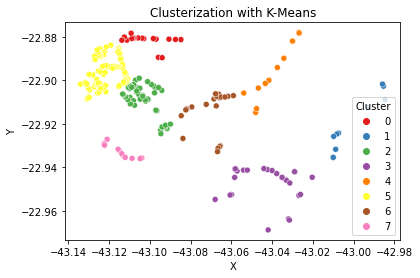

In [12]:
sns.scatterplot(data=KM8_clustered,hue='Cluster', x="X", y="Y", palette='Set1').set(title='Clusterization with K-Means')

In [13]:
# Size of each cluster
KM_clust_sizes = KM8_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,19
1,10
2,54
3,25
4,11
5,97
6,24
7,13


## Dbscan 

### The epsilon and coordinates get converted to radians, because scikit-learn’s haversine metric needs radian units.

In [14]:
# A way to measure the maximum distance between points in the same cluster
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian  #1.5km maximum distance between points to be of the same cluster
print(epsilon)

0.00023544152065839246


In [15]:
# A way to measure the minimum distance between points in the same cluster
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian  #1km maximum distance between points to be of the same cluster
print(epsilon)

0.00015696101377226163


In [16]:
# maximum distance - minimum distance = step in the iteration
(0.00023-0.00015)/5

1.6000000000000003e-05

In [17]:
from itertools import product

eps_values = np.arange(0.00015,0.00023,1.6000000000000003e-05) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [18]:
DBSCAN_params

[(0.00015, 2),
 (0.00015, 3),
 (0.00015, 4),
 (0.00015, 5),
 (0.00015, 6),
 (0.00015, 7),
 (0.00015, 8),
 (0.00015, 9),
 (0.000166, 2),
 (0.000166, 3),
 (0.000166, 4),
 (0.000166, 5),
 (0.000166, 6),
 (0.000166, 7),
 (0.000166, 8),
 (0.000166, 9),
 (0.000182, 2),
 (0.000182, 3),
 (0.000182, 4),
 (0.000182, 5),
 (0.000182, 6),
 (0.000182, 7),
 (0.000182, 8),
 (0.000182, 9),
 (0.00019800000000000002, 2),
 (0.00019800000000000002, 3),
 (0.00019800000000000002, 4),
 (0.00019800000000000002, 5),
 (0.00019800000000000002, 6),
 (0.00019800000000000002, 7),
 (0.00019800000000000002, 8),
 (0.00019800000000000002, 9),
 (0.00021400000000000002, 2),
 (0.00021400000000000002, 3),
 (0.00021400000000000002, 4),
 (0.00021400000000000002, 5),
 (0.00021400000000000002, 6),
 (0.00021400000000000002, 7),
 (0.00021400000000000002, 8),
 (0.00021400000000000002, 9)]

### Using the metric  haversine:
#### The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles. (https://en.wikipedia.org/wiki/Haversine_formula )

### Using the algorithm ball tree:
#### A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

#### |x + y| <= |x| + |y|

### (https://scikit-learn.org/stable/modules/neighbors.html#ball-tree )

In [19]:
data = np.radians(data)

In [20]:
data.head()

,X,Y
0,-0.752164,-0.399496
1,-0.752132,-0.399498
2,-0.752373,-0.399731
3,-0.752351,-0.399775
4,-0.752333,-0.399793


In [21]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1],metric='haversine',algorithm='ball_tree').fit(data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(data, DBS_clustering.labels_))

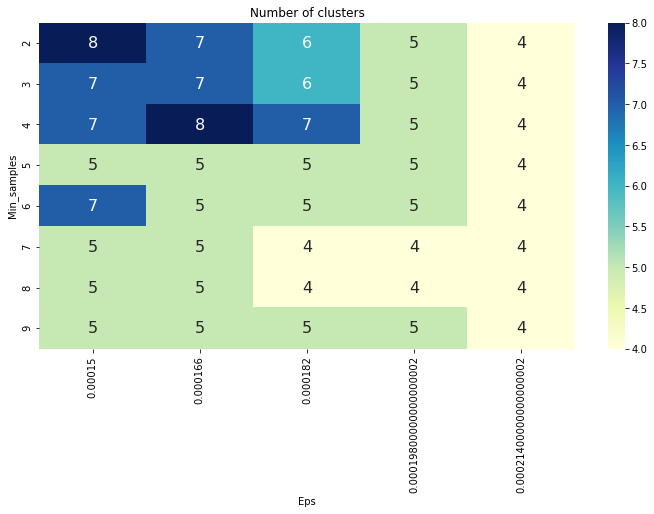

In [22]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

### As the heatmap shows the number of clusters varies from 4 to 8.

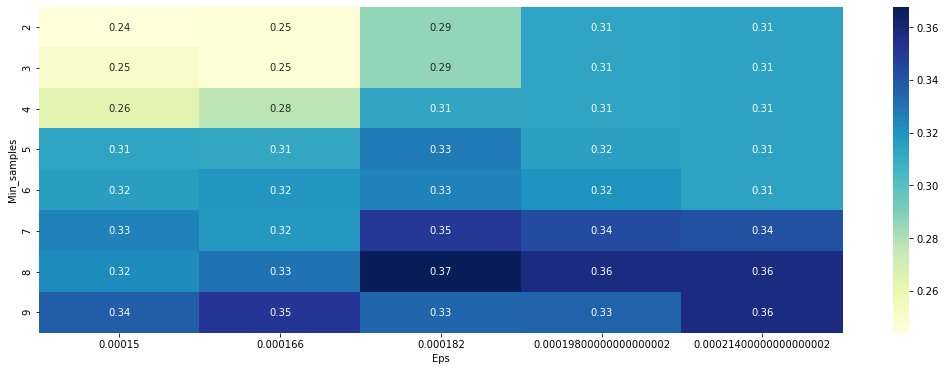

In [23]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

### Global maximum is 0.37 for eps 0.000182 and min_samples=8. 

In [24]:
DBS_clustering = DBSCAN(eps= 0.000166  , min_samples=4, metric='haversine',algorithm='ball_tree').fit(data)  #maior que 0,01 nao gera cluster

DBSCAN_clustered = data.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [25]:
DBSCAN_clustered

,X,Y,Cluster
0,-0.752164,-0.399496,0
1,-0.752132,-0.399498,0
2,-0.752373,-0.399731,0
3,-0.752351,-0.399775,0
4,-0.752333,-0.399793,0
...,...,...,...
248,-0.752445,-0.399669,0
249,-0.752448,-0.399674,0
250,-0.752450,-0.399679,0
251,-0.752460,-0.399691,0


In [26]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2
0,198
1,13
2,3
3,4
4,23
5,6
6,4


[Text(0.5, 1.0, 'Clusterization with DBSCAN')]

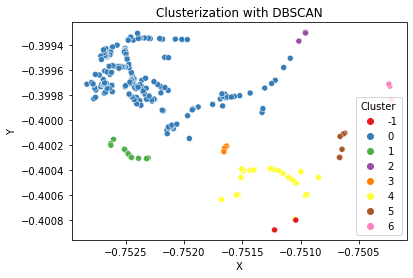

In [27]:
sns.scatterplot(data=DBSCAN_clustered,hue='Cluster', x="X", y="Y", palette='Set1').set(title='Clusterization with DBSCAN')

## It was generated the same numbers of clusters to compare the clusterization of both models. It shows that the clusters formed by K-Means are more spherical compared to the ones generated by DBSCAN (forming clusters in an arbitrary way).